## Problem Definition:

The Republic of Indonesia Ministry of Health is conducting an analysis on contraceptive use among married women. The dataset includes information on various demographic and socio-economic factors that may influence a woman's decision to use contraceptive methods. Understanding these factors is crucial for formulating effective public health policies and educational programs to increase the prevalence of contraceptive use, which can have significant implications for family planning and population control.

## Objective:

The primary objective of this analysis is to develop a predictive model that can accurately determine whether a married woman in Indonesia is likely to use a contraceptive method based on her demographic and socio-economic attributes. By analyzing the data, we aim to identify key factors that influence contraceptive use and provide actionable insights for policymakers to design targeted interventions.

The model will be trained using the following features:

    Wife's age (numerical)
    Wife's education level (categorical: uneducated, tertiary)
    Husband's education level (categorical: uneducated, tertiary)
    Number of children ever born (numerical)
    Wife's religion (binary: Non-Scientology, Scientology)
    Wife's employment status (binary: Yes, No)
    Husband's occupation (categorical)
    Standard of living index (categorical: very low, high)
    Media exposure (binary: Good, Not good)
The target variable is:

    Contraceptive method used (binary: No, Yes)

The successful model will help in predicting contraceptive use and could potentially be used to guide policy decisions and health programs aimed at improving family planning services in Indonesia.








In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Importing data

In [2]:
df=pd.read_excel("C:/Users/AKHIL MOHANDAS/Documents/Study_Material/Project 5/Contraceptive_method_dataset.xlsx")

### EDA

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


#### there are missing values

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,NaN,NaN,NaN,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
Wife_ education,1473,4,Tertiary,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,1473,4,Tertiary,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,1452.0,NaN,NaN,NaN,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Wife_religion,1473,2,Scientology,1253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,1473,2,No,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,1473.0,NaN,NaN,NaN,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0
Standard_of_living_index,1473,4,Very High,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,1473,2,Exposed,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,1473,2,Yes,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

## Univariate Analysis

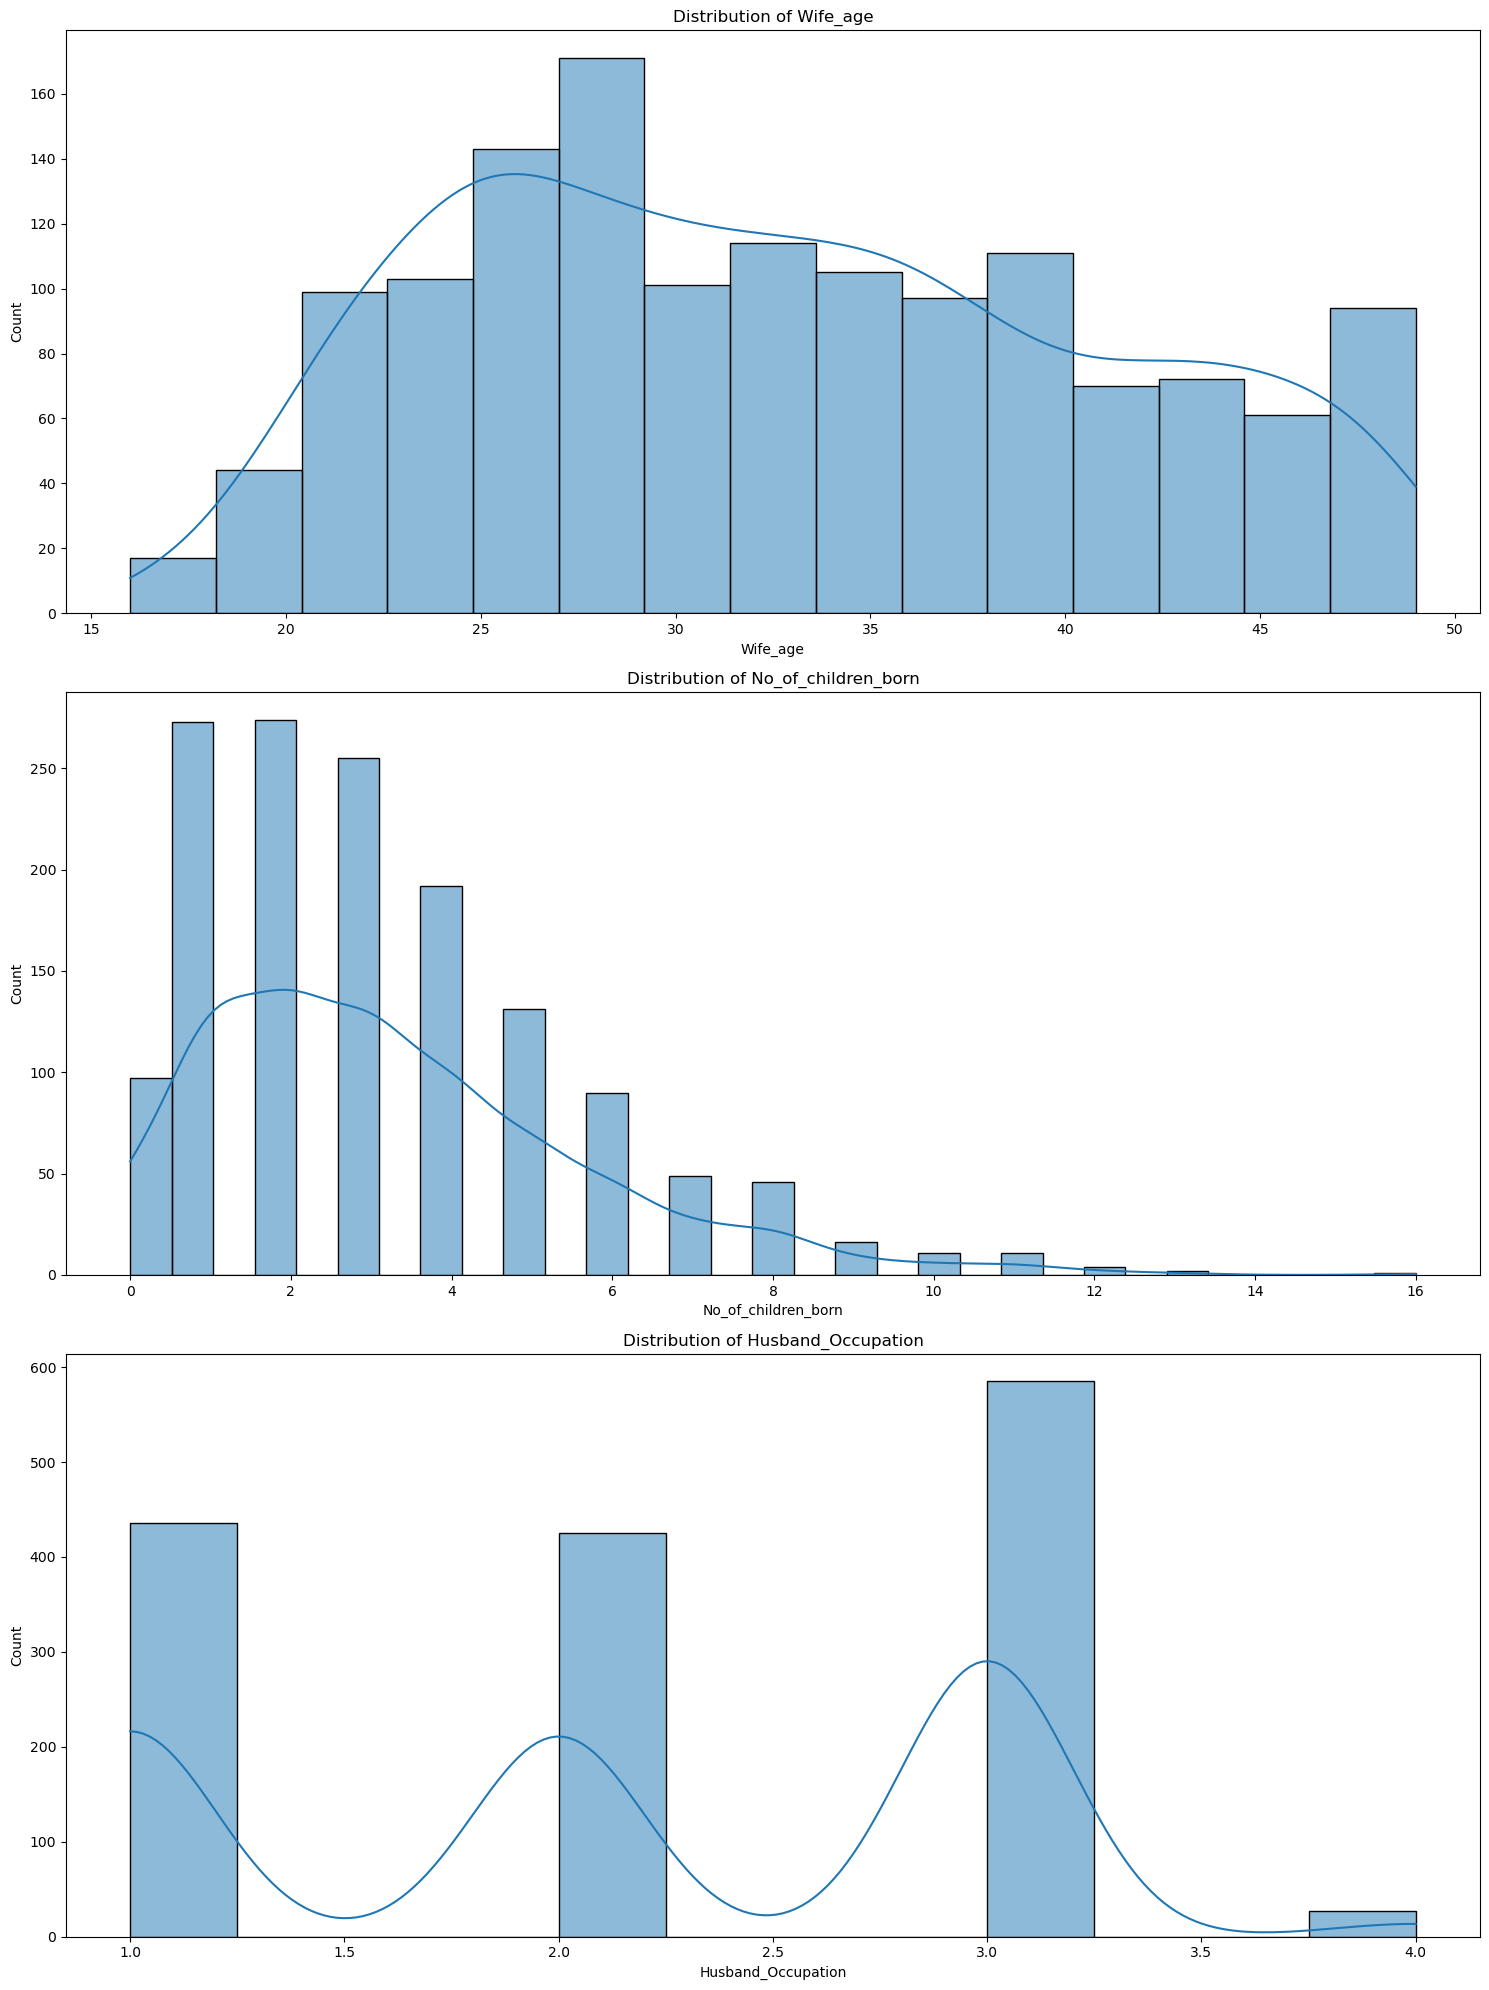

In [7]:
numerical_columns = df.select_dtypes(include=['number']).columns

#histograms
plt.figure(figsize=(15, 20))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 1, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

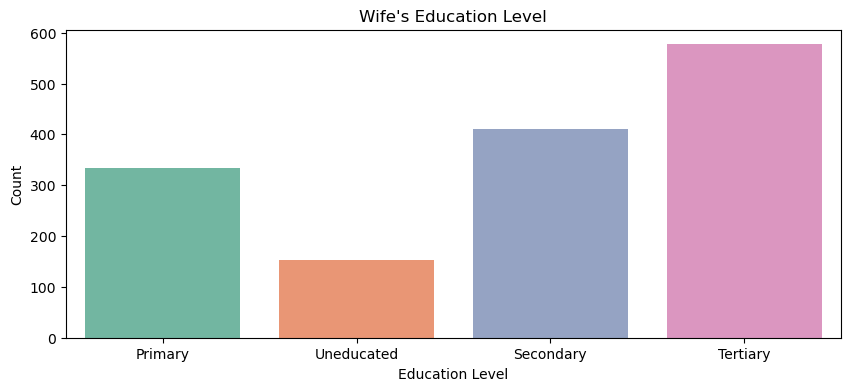

In [8]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Wife_ education', data=df, palette='Set2')
plt.title('Wife\'s Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

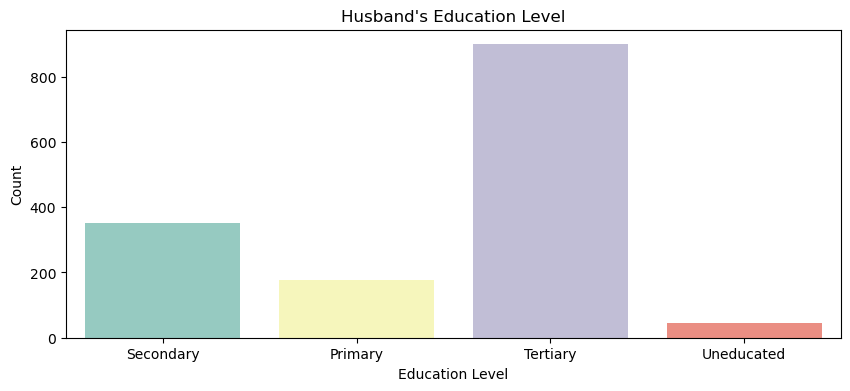

In [9]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Husband_education', data=df, palette='Set3')
plt.title('Husband\'s Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

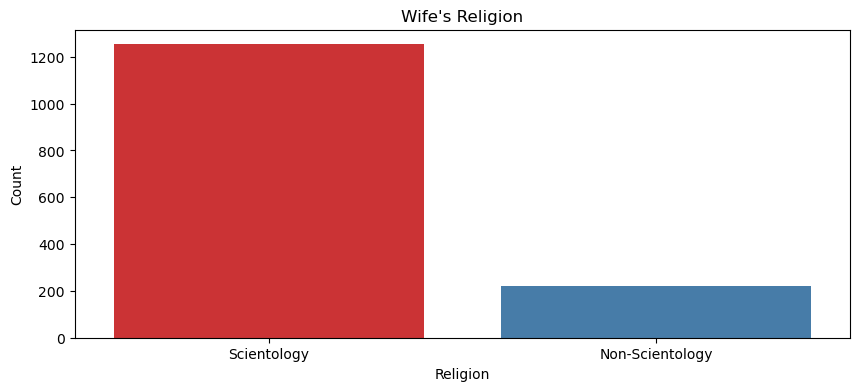

In [10]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Wife_religion', data=df, palette='Set1')
plt.title('Wife\'s Religion')
plt.xlabel('Religion')
plt.ylabel('Count')
plt.show()

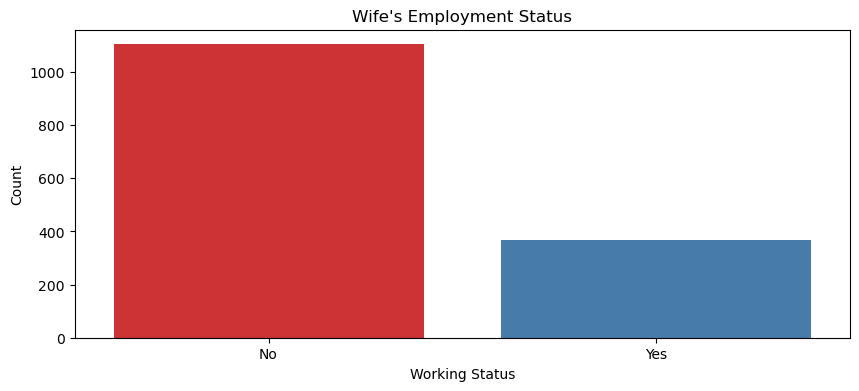

In [11]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Wife_Working', data=df, palette='Set1')
plt.title('Wife\'s Employment Status')
plt.xlabel('Working Status')
plt.ylabel('Count')
plt.show()

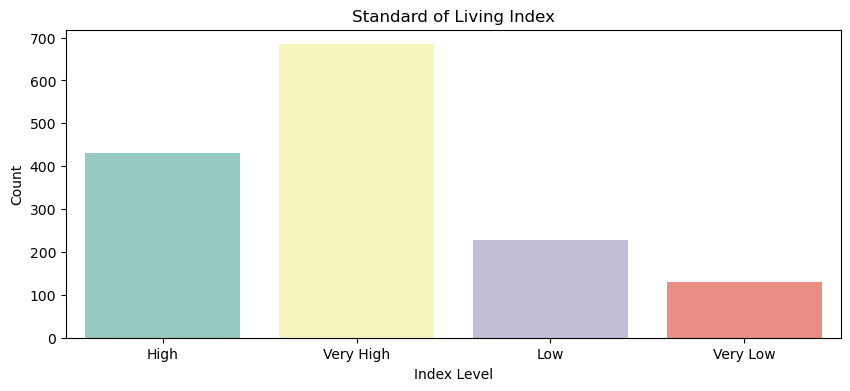

In [12]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Standard_of_living_index', data=df, palette='Set3')
plt.title('Standard of Living Index')
plt.xlabel('Index Level')
plt.ylabel('Count')
plt.show()

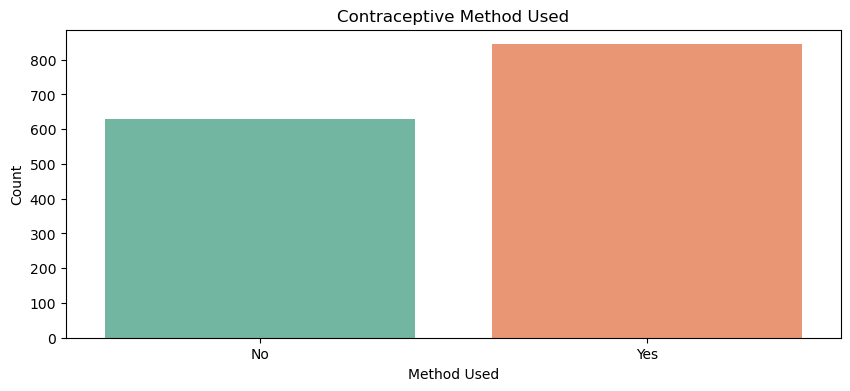

In [13]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Contraceptive_method_used', data=df, palette='Set2')
plt.title('Contraceptive Method Used')
plt.xlabel('Method Used')
plt.ylabel('Count')
plt.show()

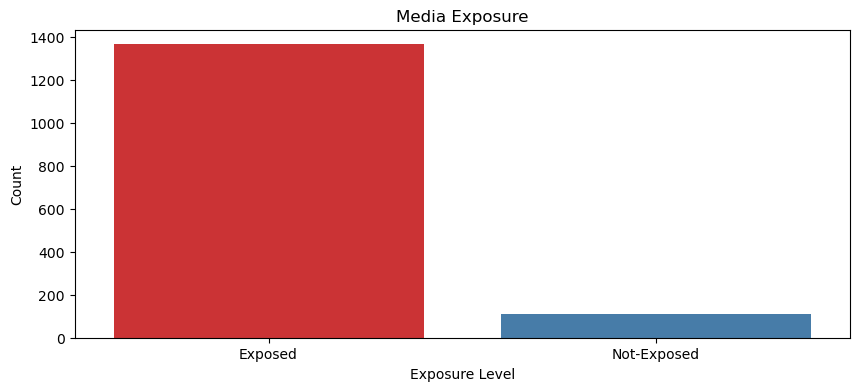

In [14]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Media_exposure ', data=df, palette='Set1')
plt.title('Media Exposure')
plt.xlabel('Exposure Level')
plt.ylabel('Count')
plt.show()

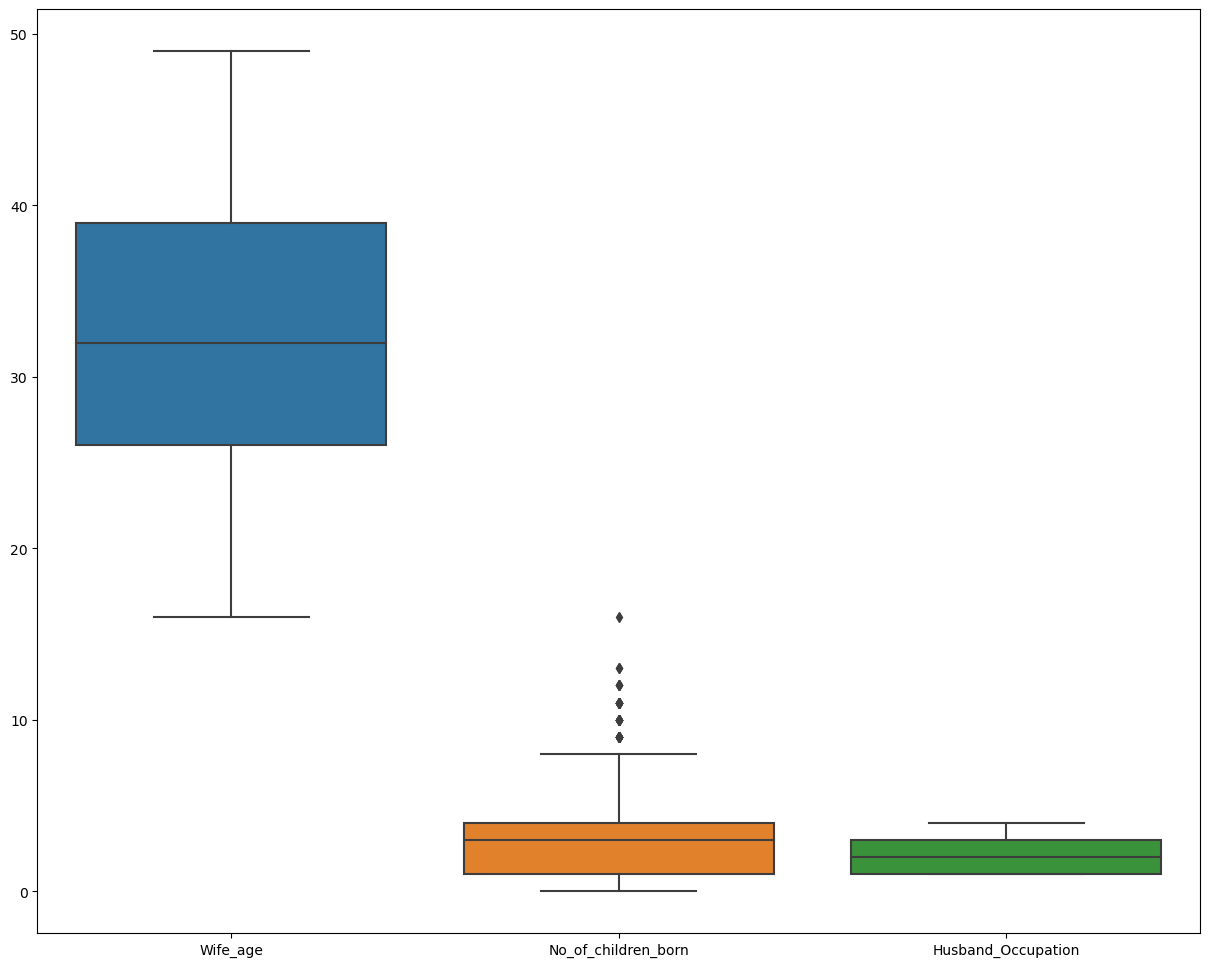

In [15]:
variables = ['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used']

plt.figure(figsize=(15, 12))
sns.boxplot(data=df[variables])
plt.show()

The education levels of both wives and husbands seem relatively high, with 'Tertiary' being the most common level of education.

A significant portion of the wives are not working, and many families have a high standard of living.

The majority of the respondents are using contraceptive methods, which aligns with the objective of predicting contraceptive use.

## multivariate analysis

C:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


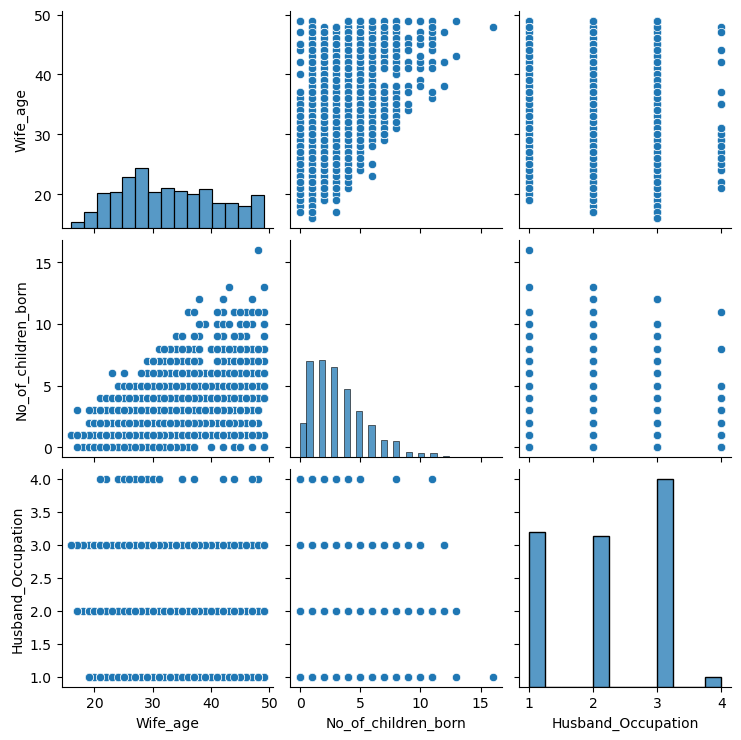

In [16]:
# Specify the variables for multivariate analysis
variables = ['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used']
# Create a pair plot for selected variables
sns.pairplot(df[variables])
plt.show()

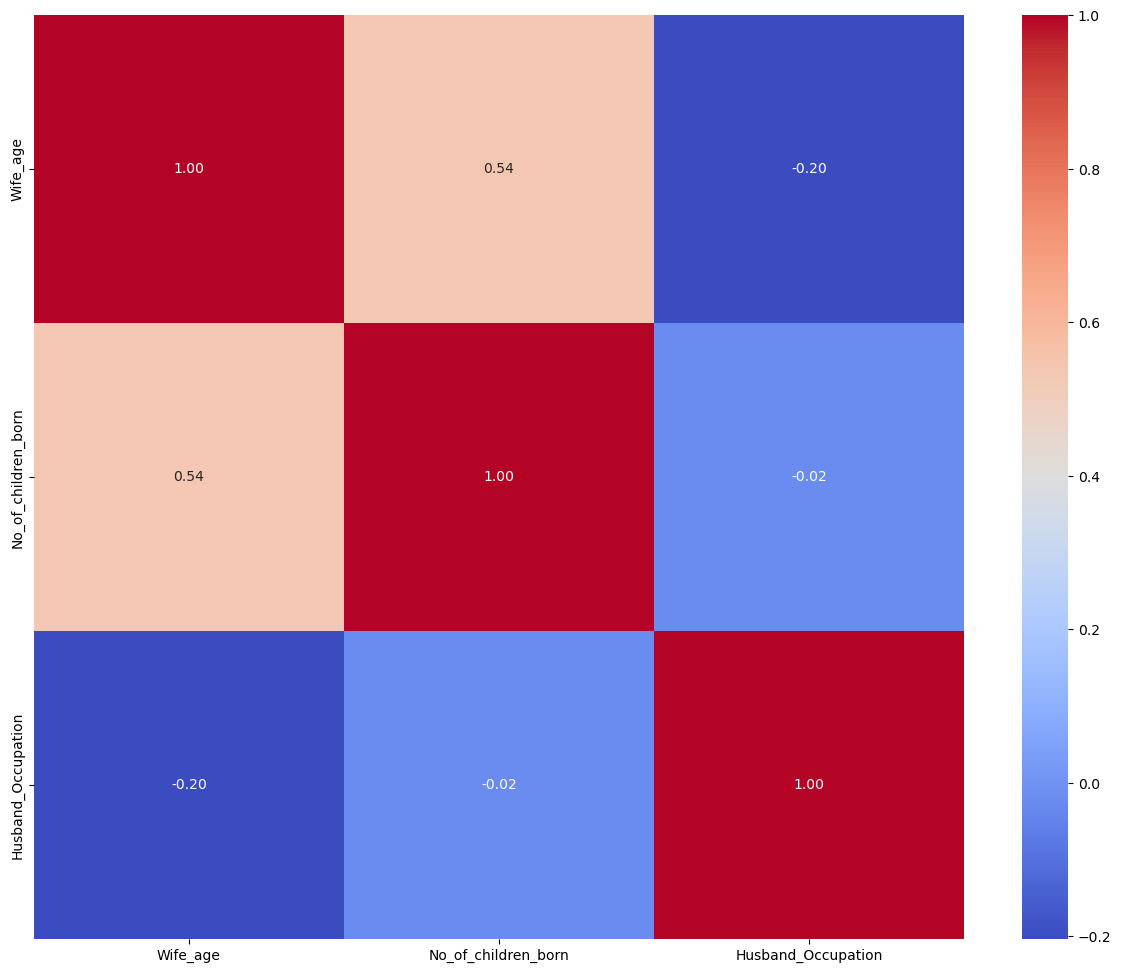

In [17]:
numeric_data = df[variables].select_dtypes(include=['float64', 'int64'])


correlation_matrix = numeric_data.corr()


plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [18]:
print(correlation_matrix)

                     Wife_age  No_of_children_born  Husband_Occupation
Wife_age             1.000000             0.538013           -0.203617
No_of_children_born  0.538013             1.000000           -0.020954
Husband_Occupation  -0.203617            -0.020954            1.000000


None of the correlations are particularly strong, with the highest being 0.538 between "Wife_age" and "No_of_children_born". This implies that while there is some relationship between these variables, it’s not overwhelmingly strong.

The positive correlation between "Wife_age" and "No_of_children_born" aligns with expectations, whereas the negative correlations involving "Husband_Occupation" are very weak, suggesting minimal linear relationship.

## Data Pre-processing

In [19]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64


There are 71 missing values are present in "wife_age" and 21 in "no_of_children_born"

In [20]:
df['Wife_age'].fillna(df['Wife_age'].median(), inplace = True)
df['No_of_children_born'].fillna(df['No_of_children_born'].median(), inplace = True)
df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [21]:
(df == 0).sum()

Wife_age                      0
Wife_ education               0
Husband_education             0
No_of_children_born          97
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

###### Converting all objects to categorical codes

### Outlier Checks

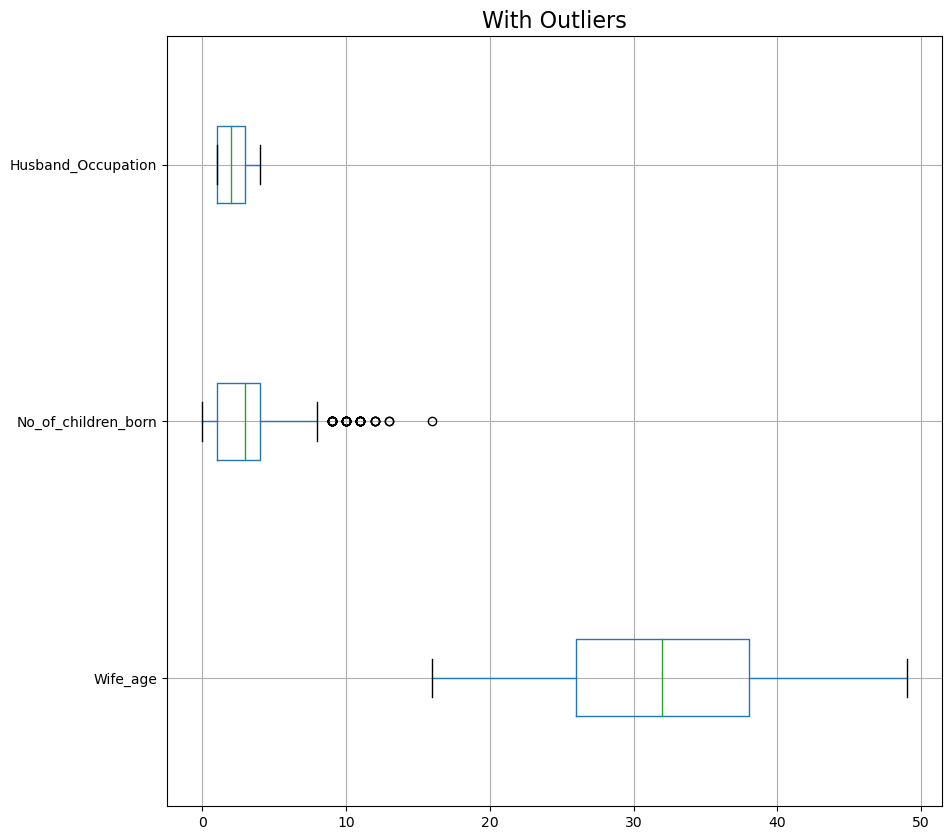

In [22]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

###### No need to remove outliers

# <font color='red'> LOGISTIC REGRESSION

In [23]:
df['Contraceptive_method_used'].value_counts()

Contraceptive_method_used
Yes    844
No     629
Name: count, dtype: int64

In [24]:
df['Contraceptive_method_used'] = df['Contraceptive_method_used'].replace({'No':0,'Yes':1})
df['Contraceptive_method_used'].value_counts()

Contraceptive_method_used
1    844
0    629
Name: count, dtype: int64

In [25]:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,0
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,0
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,0
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,0
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,0


In [26]:
## Converting the other 'object' type variables as dummy variables

df = pd.get_dummies(df,drop_first=True)
df.head()

,Wife_age,No_of_children_born,Husband_Occupation,Contraceptive_method_used,Wife_ education_Secondary,Wife_ education_Tertiary,Wife_ education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated,Wife_religion_Scientology,Wife_Working_Yes,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure _Not-Exposed
0,24.0,3.0,2,0,False,False,False,True,False,False,True,False,False,False,False,False
1,45.0,10.0,3,0,False,False,True,True,False,False,True,False,False,True,False,False
2,43.0,7.0,3,0,False,False,False,True,False,False,True,False,False,True,False,False
3,42.0,9.0,3,0,True,False,False,False,False,False,True,False,False,False,False,False
4,36.0,8.0,3,0,True,False,False,True,False,False,True,False,True,False,False,False


### Train Test Split

In [27]:
# Copy all the predictor variables into X dataframe
X = df.drop('Contraceptive_method_used', axis=1)

# Copy target into the y dataframe. 
y = df['Contraceptive_method_used']

In [28]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df['Contraceptive_method_used'])

In [29]:
y_train.value_counts(1)

Contraceptive_method_used
1    0.57323
0    0.42677
Name: proportion, dtype: float64

In [30]:
y_test.value_counts(1)

Contraceptive_method_used
1    0.572398
0    0.427602
Name: proportion, dtype: float64

### Logistic Regression Model

In [31]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty=None,verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty=None, solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [32]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [33]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.208833,0.791167
1,0.890195,0.109805
2,0.972464,0.027536
3,0.338849,0.661151
4,0.288524,0.711476


## Model Evaluation

In [34]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6925315227934045

###### Accuracy of 64.5% suggests the model has moderate performance on the training data.

### AUC and ROC for the training data

AUC: 0.715


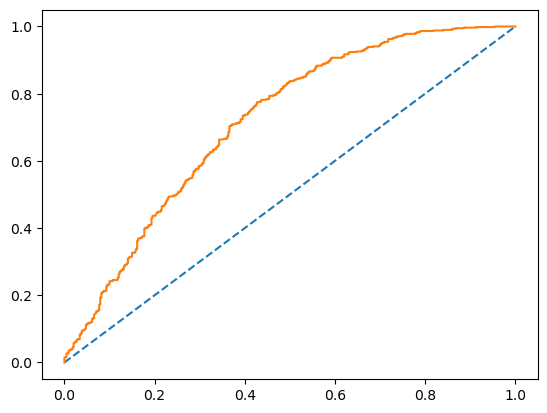

In [35]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [36]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6402714932126696

### AUC and ROC for the test data

AUC: 0.715


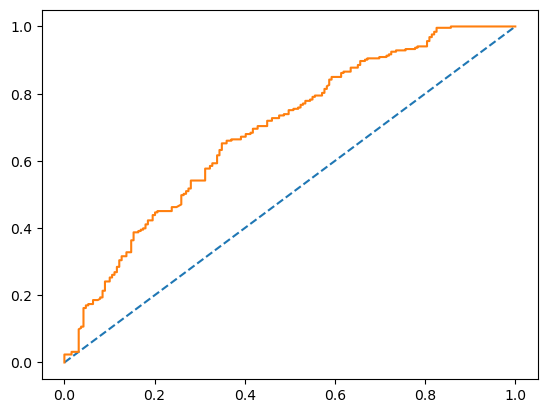

In [37]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [38]:
confusion_matrix(y_train, ytrain_predict)

array([[222, 218],
       [ 99, 492]], dtype=int64)

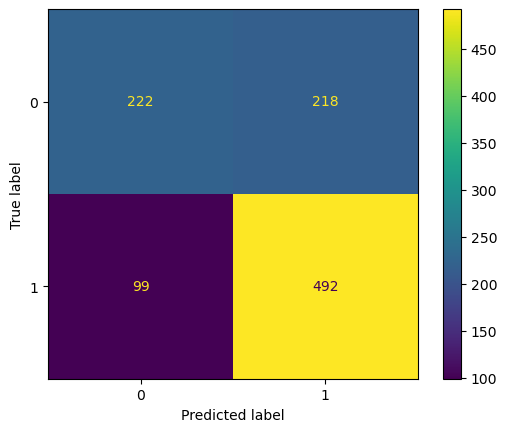

In [39]:
disp = ConfusionMatrixDisplay.from_estimator(model, X_train, y_train)

# To display the plot
plt.show()

In [40]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58       440
           1       0.69      0.83      0.76       591

    accuracy                           0.69      1031
   macro avg       0.69      0.67      0.67      1031
weighted avg       0.69      0.69      0.68      1031



The model performs better in identifying instances of class 1 (contraceptive method used) than class 0. This is evident from the higher recall and F1-score for class 1.

Given that there are more instances of class 1 than class 0, the model's performance metrics are skewed towards the majority class (class 1). This is why the recall for class 1 is higher compared to class 0.

### Confusion Matrix for test data

In [41]:
confusion_matrix(y_test, ytest_predict)

array([[ 82, 107],
       [ 52, 201]], dtype=int64)

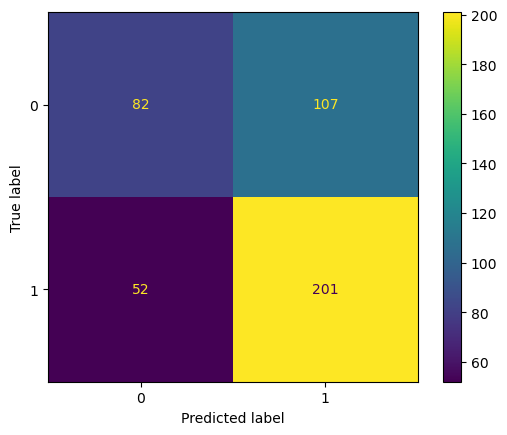

In [42]:
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

# To display the plot
plt.show()

In [43]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.61      0.43      0.51       189
           1       0.65      0.79      0.72       253

    accuracy                           0.64       442
   macro avg       0.63      0.61      0.61       442
weighted avg       0.64      0.64      0.63       442



* 79% of actual class 1 instances are correctly predicted, showing good performance in identifying class 1 in the test set.

* 43% of actual class 0 instances are correctly predicted, indicating that the model struggles to identify class 0 instances in the test set.

* The accuracy of 64% and the F1-scores suggest that the model performs reasonably well.

## Applying GridSearchCV for Logistic Regression

In [44]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [45]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [46]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [47]:
grid_search.fit(X_train, y_train)

C:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ANACONDA\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ANACONDA\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ANACONDA\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_paramete

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [48]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [49]:
best_model = grid_search.best_estimator_

In [50]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [51]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.207635,0.792365
1,0.880277,0.119723
2,0.970076,0.029924
3,0.338183,0.661817
4,0.290862,0.709138


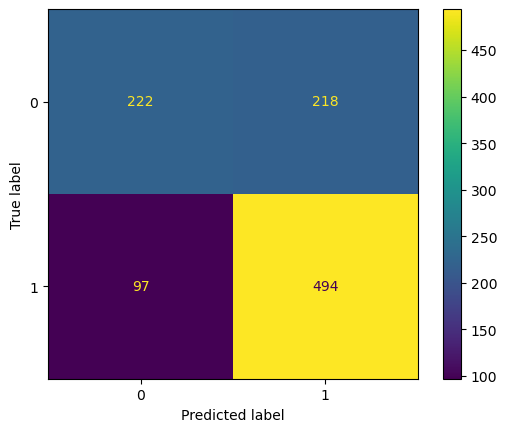

In [52]:
disp = ConfusionMatrixDisplay.from_estimator(best_model,X_train,y_train)

# To display the plot
plt.show()

In [53]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58       440
           1       0.69      0.84      0.76       591

    accuracy                           0.69      1031
   macro avg       0.69      0.67      0.67      1031
weighted avg       0.69      0.69      0.68      1031



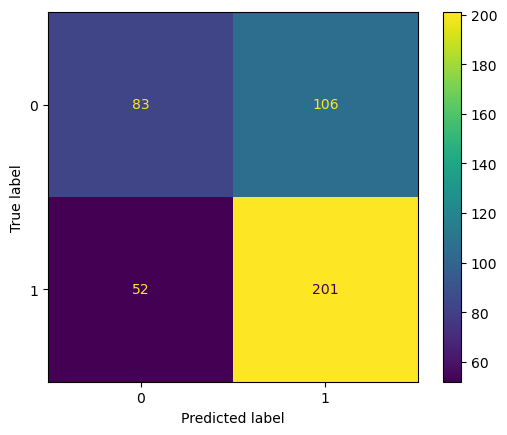

In [54]:
disp = ConfusionMatrixDisplay.from_estimator(best_model,X_test,y_test)

# To display the plot
plt.show()

In [55]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.61      0.44      0.51       189
           1       0.65      0.79      0.72       253

    accuracy                           0.64       442
   macro avg       0.63      0.62      0.62       442
weighted avg       0.64      0.64      0.63       442



* At 44%, the model misses a substantial portion of actual class 0 instances, indicating poor performance in identifying this class.
* At 83%, the model is quite effective at identifying class 1 instances, showing strong performance for this class.

In [56]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, ytest_predict).ravel()

In [57]:
tn,fp,fn,tp

(83, 106, 52, 201)

In [58]:
(tp+tn)/(tp+tn+fp+fn)# ACCURACY of predicting 0's and 1's correctly  

0.6425339366515838

In [59]:
tp/(tp+fp)#Precision for 1's

0.6547231270358306

In [60]:
tp/(tp+fn)#Recall for 1's

0.7944664031620553

# <font color='red'>LDA Model</font>

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection

In [62]:
# Copy all the predictor variables into X dataframe
X = df.drop('Contraceptive_method_used', axis=1)

# Copy target into the y dataframe. 
y = df['Contraceptive_method_used']

In [63]:
y.value_counts()

Contraceptive_method_used
1    844
0    629
Name: count, dtype: int64

In [64]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.30,random_state=1,stratify = y)

In [65]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1031, 15)
Number of rows and columns of the training set for the dependent variable: (1031,)
Number of rows and columns of the test set for the independent variables: (442, 15)
Number of rows and columns of the test set for the dependent variable: (442,)


#### Applying Standard Scaler to scale the data 

In [66]:
from sklearn.preprocessing import StandardScaler
stand_scal = StandardScaler()
X_train = stand_scal.fit_transform(X_train)
X_test = stand_scal.transform (X_test)

#### Build LDA Model

In [67]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

### Prediction

In [68]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

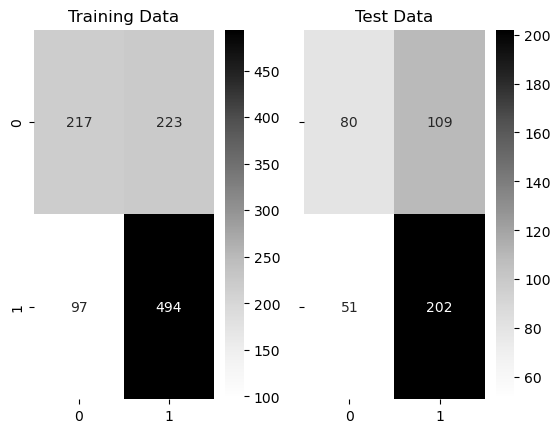

In [69]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


### Training Data and Test Data Classification Report Comparison

In [70]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.69      0.49      0.58       440
           1       0.69      0.84      0.76       591

    accuracy                           0.69      1031
   macro avg       0.69      0.66      0.67      1031
weighted avg       0.69      0.69      0.68      1031
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.61      0.42      0.50       189
           1       0.65      0.80      0.72       253

    accuracy                           0.64       442
   macro avg       0.63      0.61      0.61       442
weighted avg       0.63      0.64      0.62       442
 



#### Inferences using the default value 0.5 for cut-off for test data

Overall accuracy of the model – 64 % of total predictions are correct.

The training accuracy was slightly higher at 69%, suggesting some overfitting

For {Customer who didnot use Contraceptive method (Label 0 )}:
   
   <b/>Precision (61%) – 61% of Customers who didnot use Contraceptive method are correctly predicted ,out of all Customers who didnot use Contraceptive method that are predicted .</b>
   
   <b/>Recall (42%) – Out of all the Customers who actually didnot use Contraceptive method , 42% of Customers who didnot Churn have been predicted correctly .</b>
    
For {Customer who did use Contraceptive method (Label 1 )}:
    
   <b/>Precision (65%) – 65% of Customers who did use Contraceptive method are correctly predicted ,out of all Customers who did use Contraceptive method that are predicted .</b>
   
   <b/>Recall (80%) – Out of all the Customers who actually did use Contraceptive method , 80% of Customers who did use Contraceptive method have been predicted correctly .</b>
    

### Probability prediction for the training and test data

In [71]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.715
AUC for the Test Data: 0.688


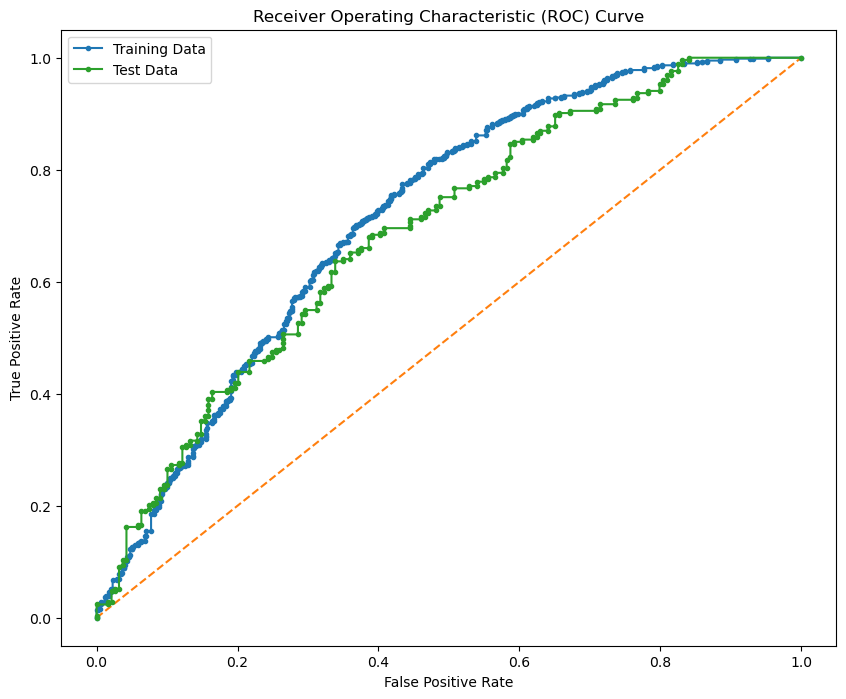

In [72]:
auc_train = metrics.roc_auc_score(y_train, pred_prob_train[:, 1])
print('AUC for the Training Data: %.3f' % auc_train)

# Calculate ROC curve
fpr_train, tpr_train, _ = metrics.roc_curve(y_train, pred_prob_train[:, 1])

# Plot ROC curve
plt.figure(figsize=(10, 8))  # Increase the size of the plot
plt.plot(fpr_train, tpr_train, marker='.', label='Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')

# AUC and ROC for the test data

# Calculate AUC
auc_test = metrics.roc_auc_score(y_test, pred_prob_test[:, 1])
print('AUC for the Test Data: %.3f' % auc_test)

# Calculate ROC curve
fpr_test, tpr_test, _ = metrics.roc_curve(y_test, pred_prob_test[:, 1])

# Plot ROC curve
plt.plot(fpr_test, tpr_test, marker='.', label='Test Data')
plt.legend(loc='best')
plt.show()

In [73]:
pred_prob_train[:,1]

array([0.74625151, 0.49147319, 0.80274639, ..., 0.67272837, 0.09814726,
       0.80741142])

### Generate Coefficients and intercept for the Linear Discriminant Function

In [74]:
#intercept value
clf.intercept_ 

array([0.35036335])

In [75]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-0.71063062,  0.75097233,  0.03862939,  0.28527667,  0.59048   ,
        -0.03734538, -0.00155129, -0.03966578, -0.02399926, -0.14722681,
        -0.07760247, -0.03128246,  0.15955965, -0.1940992 , -0.18223831]])

In [76]:
X.columns

Index(['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_ education_Secondary', 'Wife_ education_Tertiary',
       'Wife_ education_Uneducated', 'Husband_education_Secondary',
       'Husband_education_Tertiary', 'Husband_education_Uneducated',
       'Wife_religion_Scientology', 'Wife_Working_Yes',
       'Standard_of_living_index_Low', 'Standard_of_living_index_Very High',
       'Standard_of_living_index_Very Low', 'Media_exposure _Not-Exposed'],
      dtype='object')

In [77]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.71,  0.75,  0.04,  0.29,  0.59, -0.04, -0.  , -0.04, -0.02,
        -0.15, -0.08, -0.03,  0.16, -0.19, -0.18]])

* Higher standard of living and media exposure are associated with Contraceptive method usage, indicating a correlation between socioeconomic factors and Contraceptive method use.
* Older age and lower education levels tend to push the prediction towards No Contraceptive method use, while more children and higher education levels for the wife push towards use of Contraceptive method.

# <font color='red'> CART

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
for feature in df.columns: 
    if df[feature].dtype == 'int': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes

### Proportion of 1s and 0s (Contraceptive_method_used Yes / No)

In [80]:
df.Contraceptive_method_used.value_counts(normalize=True)

Contraceptive_method_used
1    0.57298
0    0.42702
Name: proportion, dtype: float64

In [81]:
df.head()

,Wife_age,No_of_children_born,Husband_Occupation,Contraceptive_method_used,Wife_ education_Secondary,Wife_ education_Tertiary,Wife_ education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated,Wife_religion_Scientology,Wife_Working_Yes,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure _Not-Exposed
0,24.0,3.0,2,0,False,False,False,True,False,False,True,False,False,False,False,False
1,45.0,10.0,3,0,False,False,True,True,False,False,True,False,False,True,False,False
2,43.0,7.0,3,0,False,False,False,True,False,False,True,False,False,True,False,False
3,42.0,9.0,3,0,True,False,False,False,False,False,True,False,False,False,False,False
4,36.0,8.0,3,0,True,False,False,True,False,False,True,False,True,False,False,False


In [82]:
X = df.drop("Contraceptive_method_used", axis=1)

y = df.pop("Contraceptive_method_used")

X.head()

,Wife_age,No_of_children_born,Husband_Occupation,Wife_ education_Secondary,Wife_ education_Tertiary,Wife_ education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated,Wife_religion_Scientology,Wife_Working_Yes,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure _Not-Exposed
0,24.0,3.0,2,False,False,False,True,False,False,True,False,False,False,False,False
1,45.0,10.0,3,False,False,True,True,False,False,True,False,False,True,False,False
2,43.0,7.0,3,False,False,False,True,False,False,True,False,False,True,False,False
3,42.0,9.0,3,True,False,False,False,False,False,True,False,False,False,False,False
4,36.0,8.0,3,True,False,False,True,False,False,True,False,True,False,False,False


### Splitting data into training and test set

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Checking the dimensions of the training and test data

In [84]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',8083+3465)

X_train (1031, 15)
X_test (442, 15)
train_labels (1031,)
test_labels (442,)
Total Obs 11548


### Building a Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [86]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [87]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()


### Variable Importance

In [88]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                                         Imp
Wife_age                            0.354195
No_of_children_born                 0.264046
Husband_Occupation                  0.062087
Wife_ education_Tertiary            0.054522
Wife_Working_Yes                    0.041557
Standard_of_living_index_Very High  0.036616
Husband_education_Secondary         0.029808
Standard_of_living_index_Low        0.028565
Husband_education_Tertiary          0.028192
Wife_ education_Secondary           0.025324
Wife_religion_Scientology           0.024209
Wife_ education_Uneducated          0.017051
Media_exposure _Not-Exposed         0.015692
Standard_of_living_index_Very Low   0.010302
Husband_education_Uneducated        0.007833


### Predicting Test Data

In [89]:
y_predict = dt_model.predict(X_test)

In [90]:
y_predict.shape

(442,)

# Regularising the Decision Tree

### Adding Tuning Parameters

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,5,10,15,20],
              'min_samples_leaf':[1,5,10,15,20],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, train_labels)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


C:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
750 fits failed out of a total of 2250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
750 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ANACONDA\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ANACONDA\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ANACONDA\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ANACONDA\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_par

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             verbose=True)

In [92]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=10,
                       max_features='sqrt', min_samples_leaf=5,
                       random_state=1024)

In [93]:
reg_dt_model = DecisionTreeClassifier(
    ccp_alpha=0.001,
    criterion='entropy',
    max_depth=15,
    max_features='sqrt',  # Choose an appropriate value
    random_state=1024
)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=15,
                       max_features='sqrt', random_state=1024)

### Generating New Tree

In [94]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

### Variable Importance

In [95]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                         Imp
Wife_age                            0.351360
No_of_children_born                 0.281998
Husband_Occupation                  0.070571
Standard_of_living_index_Very High  0.042846
Wife_religion_Scientology           0.036662
Wife_ education_Uneducated          0.036176
Wife_Working_Yes                    0.026032
Wife_ education_Secondary           0.024078
Wife_ education_Tertiary            0.023682
Standard_of_living_index_Low        0.023316
Husband_education_Secondary         0.022934
Standard_of_living_index_Very Low   0.018468
Media_exposure _Not-Exposed         0.016914
Husband_education_Tertiary          0.013156
Husband_education_Uneducated        0.011809


### Predicting on Training and Test dataset

In [96]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [97]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (1031,)
ytest_predict (442,)


### Getting the Predicted Classes

In [98]:
ytest_predict

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,

### Getting the Predicted Probabilities

In [99]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.4       , 0.6       ],
       [0.4       , 0.6       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.10714286, 0.89285714],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.32258065, 0.67741935],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.32258065, 0.67741935],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.10714286, 0.89285714],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.32258065, 0.67741935],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.3       , 0.7       ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.

In [100]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.6,0.4
3,1.0,0.0
4,1.0,0.0


# Model Evaluation

## Measuring AUC-ROC Curve

### AUC and ROC for the training data

AUC: 0.969


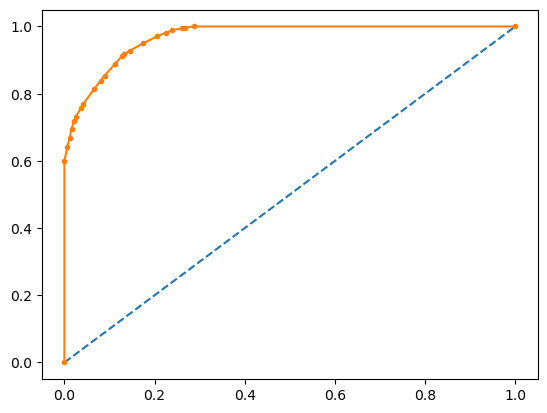

In [101]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.654


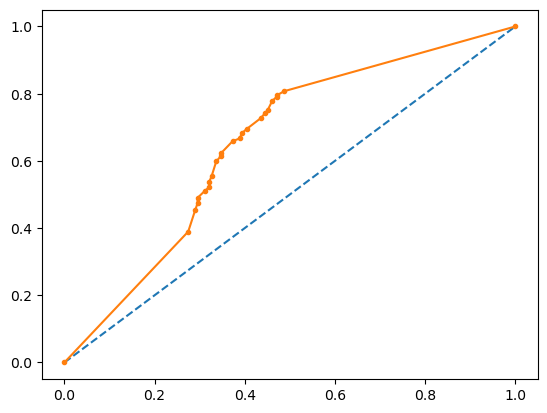

In [102]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Confusion Matrix for the training data

In [103]:
from sklearn.metrics import classification_report,confusion_matrix

In [104]:
confusion_matrix(train_labels, ytrain_predict)

array([[373,  63],
       [ 43, 552]], dtype=int64)

In [105]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.8971871968962173

In [106]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       436
           1       0.90      0.93      0.91       595

    accuracy                           0.90      1031
   macro avg       0.90      0.89      0.89      1031
weighted avg       0.90      0.90      0.90      1031



## Confusion Matrix for test data

In [107]:
confusion_matrix(test_labels, ytest_predict)

array([[115,  78],
       [ 76, 173]], dtype=int64)

In [108]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.6515837104072398

In [109]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60       193
           1       0.69      0.69      0.69       249

    accuracy                           0.65       442
   macro avg       0.65      0.65      0.65       442
weighted avg       0.65      0.65      0.65       442



* The model shows very high performance on the training data with an accuracy of 90%. Both classes have strong precision, recall, and F1-scores.
* There is a noticeable drop in accuracy from the training data (90%) to the test data (65%). This suggests that the model may be overfitting the training data and not generalizing well to unseen data.

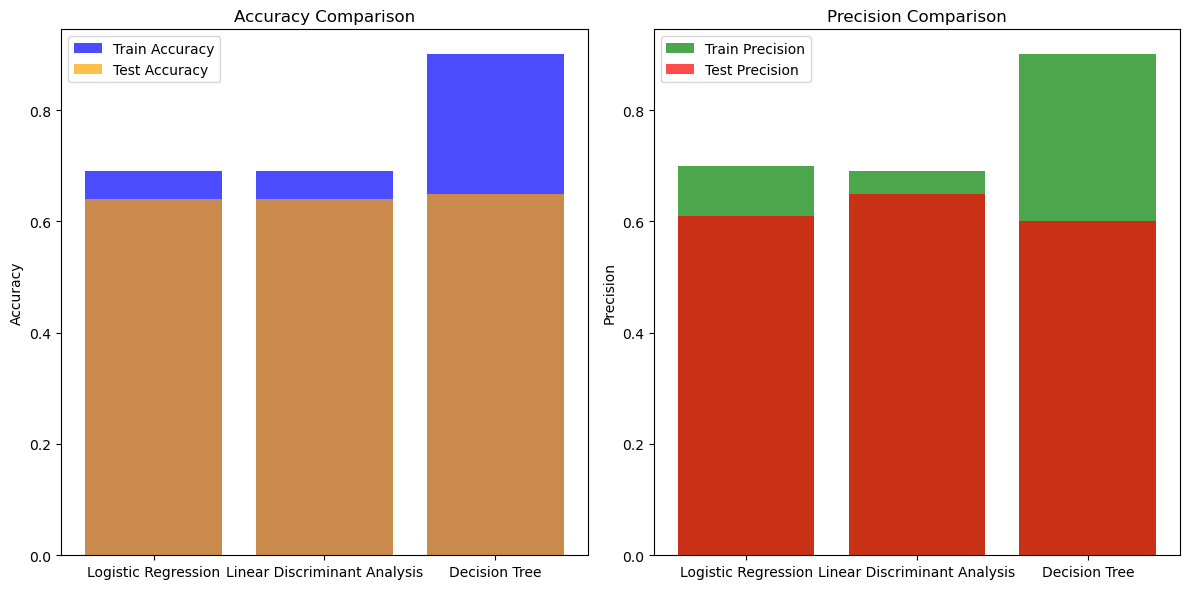

In [110]:
# Data for histograms
models = ['Logistic Regression', 'Linear Discriminant Analysis', 'Decision Tree']
train_accuracy = [0.69, 0.69, 0.90]
test_accuracy = [0.64, 0.64, 0.65]

train_precision = [0.70, 0.69, 0.90]
test_precision = [0.61, 0.65, 0.60]

train_recall = [0.50, 0.49, 0.86]
test_recall = [0.44, 0.42, 0.60]

# Plotting histograms for accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(models, train_accuracy, color='blue', alpha=0.7, label='Train Accuracy')
plt.bar(models, test_accuracy, color='orange', alpha=0.7, label='Test Accuracy')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.legend()

# Plotting histograms for precision
plt.subplot(1, 2, 2)
plt.bar(models, train_precision, color='green', alpha=0.7, label='Train Precision')
plt.bar(models, test_precision, color='red', alpha=0.7, label='Test Precision')
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

* The Decision Tree has the highest training accuracy but struggles with generalization as shown by its lower test accuracy. Logistic Regression and LDA show consistent performance on both training and test data.
* On the test set, Logistic Regression has slightly higher precision compared to the Decision Tree. Precision for the LDA is slightly higher on the test set compared to the Decision Tree.
* The Decision Tree has higher recall on the training set but performs similarly to Logistic Regression and LDA on the test set.

## Conclusion and Recommendations

* The most significant predictors are the wife’s age and the number of children born. These factors are crucial for understanding contraceptive choices. This suggests that age and family size are primary determinants in whether women are likely to use contraceptive methods.
* Economic and living conditions, as reflected by the standard of living index, also play an important role. This indicates that financial stability and living standards significantly influence contraceptive decisions.
* Cultural factors, including religion and education level, have a notable impact. This shows that beliefs and educational background are important considerations in contraceptive use.

* The husband’s education level has a lower impact on the prediction. While it contributes to the model, its influence is less compared to other attributes.

* Design targeted outreach programs focusing on women in specific age groups and those with varying numbers of children. Provide tailored information on contraceptive options that align with their life stage and family planning needs.
* Implement programs that cater to different economic groups. For lower-income groups, consider providing affordable or subsidized contraceptive options and education on family planning. For higher-income groups, offer premium services and advanced options.
* Develop culturally sensitive educational materials and counseling services. Ensure that these resources respect religious beliefs and address educational backgrounds to increase their relevance and acceptance.
* Offer specific programs for working women, recognizing their unique schedules and challenges. Provide flexible and convenient options that fit their lifestyle, such as online consultations or workplace-based education sessions.